In [3]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [5]:
data.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


In [6]:
data.shape

(1025, 14)

In [7]:
data.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [9]:
data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [10]:
print(data['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


In [11]:
print(data.dtypes)


age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object


In [12]:
data.shape

(1025, 14)

In [13]:
print(data.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


In [14]:
# Identify categorical columns
categorical_columns = [
    'sex', 
    'chest_pain_type', 
    'fasting_blood_sugar',
    'rest_ecg',
    'exercise_induced_angina',
    'slope',
    'vessels_colored_by_flourosopy',
    'thalassemia'
]

# Create label encoders and transform
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

print("Data types after encoding:")
print(data.dtypes)
print("\nFirst few rows after encoding:")
data.head()

Data types after encoding:
age                                int64
sex                                int64
chest_pain_type                    int64
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                           int64
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                              int64
vessels_colored_by_flourosopy      int64
thalassemia                        int64
target                             int64
dtype: object

First few rows after encoding:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [16]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and you want to split 'data' into features (X) and target (y)
X = data.drop('target', axis=1)  # Replace 'target_column' with the name of your target column
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (820, 13) (820,)
Testing set shape: (205, 13) (205,)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)


Training Mean Squared Error: 0.00156609756097561
Testing Mean Squared Error: 0.01721121951219512


In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training Mean Absolute Error:", train_mae)
print("Testing Mean Absolute Error:", test_mae)
print("Training R-squared:", train_r2)
print("Testing R-squared:", test_r2)


Training Mean Absolute Error: 0.018414634146341466
Testing Mean Absolute Error: 0.06258536585365855
Training R-squared: 0.9937293054885638
Testing R-squared: 0.9311534837235865


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.7902439024390244


In [26]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.8


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9853658536585366


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.7317073170731707


# Random forest is most suitable

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# New data for prediction
new_data = pd.DataFrame({
    'age': [50, 65, 43],
    'sex': [1, 0, 1],
    'chest_pain_type': [2, 4, 3],
    'resting_blood_pressure': [130, 150, 120],
    'cholestoral': [230, 250, 180],
    'fasting_blood_sugar': [0, 1, 0],
    'rest_ecg': [1, 2, 0],
    'Max_heart_rate': [170, 145, 160],
    'exercise_induced_angina': [0, 1, 0],
    'oldpeak': [1.2, 2.3, 1.0],
    'slope': [1, 2, 0],
    'vessels_colored_by_flourosopy': [0, 3, 1],
    'thalassemia': [3, 3, 2]
})



In [32]:
# Make predictions on the new data
new_predictions = rf.predict(new_data)

print("Predictions for new data:", new_predictions)


Predictions for new data: [0 0 0]


In [33]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)

# Calculate Mean Absolute Error and R-squared for additional evaluation
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Accuracy on Test Set:", accuracy)
print("Mean Absolute Error on Test Set:", mae)
print("R-squared on Test Set:", r2)


Accuracy on Test Set: 0.9853658536585366
Mean Absolute Error on Test Set: 0.014634146341463415
R-squared on Test Set: 0.9414620217018846


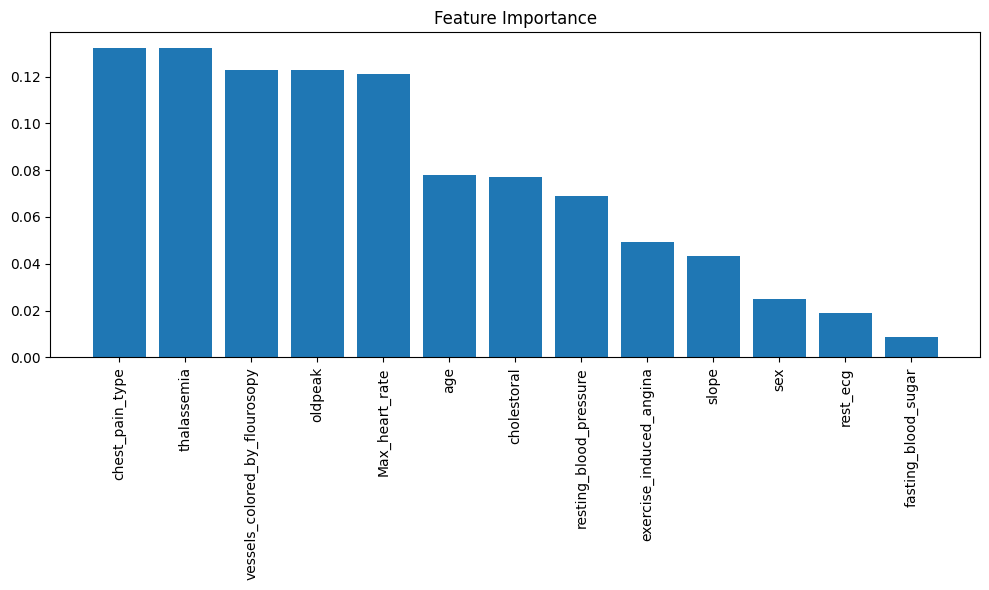

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

# Corrected parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Fit the grid search
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best accuracy found:  0.9768292682926829


In [38]:
import joblib

# Save the model to a file
joblib.dump(rf, 'optimized_random_forest_model.pkl')

# Load the model from the file
loaded_model = joblib.load('optimized_random_forest_model.pkl')

# Verify by making predictions
new_predictions = loaded_model.predict(new_data)
print("Predictions for new data:", new_predictions)


Predictions for new data: [0 0 0]


In [39]:
import numpy as np
import pandas as pd

# Set the number of samples you want to generate
num_samples = 1000

# Generate random data based on the structure of your existing dataset
np.random.seed(42)  # For reproducibility

synthetic_data = pd.DataFrame({
    'age': np.random.randint(30, 80, size=num_samples),
    'sex': np.random.randint(0, 2, size=num_samples),
    'chest_pain_type': np.random.randint(0, 4, size=num_samples),
    'resting_blood_pressure': np.random.randint(100, 180, size=num_samples),
    'cholestoral': np.random.randint(150, 300, size=num_samples),
    'fasting_blood_sugar': np.random.randint(0, 2, size=num_samples),
    'rest_ecg': np.random.randint(0, 3, size=num_samples),
    'Max_heart_rate': np.random.randint(100, 200, size=num_samples),
    'exercise_induced_angina': np.random.randint(0, 2, size=num_samples),
    'oldpeak': np.random.uniform(0, 5, size=num_samples),
    'slope': np.random.randint(0, 3, size=num_samples),
    'vessels_colored_by_flourosopy': np.random.randint(0, 4, size=num_samples),
    'thalassemia': np.random.randint(1, 4, size=num_samples),
})

print(synthetic_data)


     age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0     68    0                0                     121          213   
1     58    0                1                     142          240   
2     44    0                2                     114          266   
3     72    1                2                     159          247   
4     37    0                1                     111          160   
..   ...  ...              ...                     ...          ...   
995   55    0                3                     127          271   
996   63    1                1                     104          256   
997   74    1                2                     116          245   
998   35    1                1                     135          240   
999   66    0                2                     118          279   

     fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                      1         2             122                  

In [40]:
# Use the previously trained Random Forest model to predict on synthetic data
synthetic_predictions = rf.predict(synthetic_data)

print("Predictions for synthetic data:", synthetic_predictions)

# Since we don't have the true labels for synthetic data, we can't compute accuracy directly.
# However, you can use the predicted probabilities to analyze the distribution:
synthetic_probabilities = rf.predict_proba(synthetic_data)

# Analyze the predicted probabilities
print("Predicted probabilities for synthetic data:\n", synthetic_probabilities)


Predictions for synthetic data: [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0